In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from sklearn import linear_model
import os
from numpy import *
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# http://www.maths.adelaide.edu.au/emac2009/#Data
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

In [5]:
os.getcwd()

'/Users/nmolivo/Google Drive/Time Series Regression Analysis/01 Time Series Data'

In [18]:
ME = pd.read_table("Maine.dat")

In [19]:
ME.head()

,unemploy
0,6.7
1,6.7
2,6.4
3,5.9
4,5.2


In [40]:
from datetime import date, datetime, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta
fulldate = []
for result in perdelta(date(1996, 1, 1), date(2006, 9, 1), timedelta(days=1)): 
    fulldate.append(result)

In [41]:
fulldate[:5]

[datetime.date(1996, 1, 1),
 datetime.date(1996, 1, 2),
 datetime.date(1996, 1, 3),
 datetime.date(1996, 1, 4),
 datetime.date(1996, 1, 5)]

In [42]:
fdate = [d for d in fulldate if d.day == 1]

In [43]:
fdate[:5]

[datetime.date(1996, 1, 1),
 datetime.date(1996, 2, 1),
 datetime.date(1996, 3, 1),
 datetime.date(1996, 4, 1),
 datetime.date(1996, 5, 1)]

In [44]:
len(ME)

128

In [45]:
len(fdate)

128

In [46]:
ME["fdate"] = fdate

In [50]:
ME.head()

,unemploy,fdate
fdate,,
1996-01-01,6.7,1996-01-01
1996-02-01,6.7,1996-02-01
1996-03-01,6.4,1996-03-01
1996-04-01,5.9,1996-04-01
1996-05-01,5.2,1996-05-01


In [49]:
ME.index = ME['fdate']

In [61]:
i = list(range(1996, 2007))
ann = []

In [62]:
i

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]

In [73]:
np.mean(ME.ix[date(1996,1,1):date(1996,12,1)].unemploy)

5.258333333333334

In [74]:
for year in i:
    ann.append(np.mean(ME.ix[date(year,1,1):date(year,12,1)].unemploy))

In [75]:
ann

[5.258333333333334,
 5.124999999999999,
 4.508333333333334,
 3.9500000000000006,
 3.2750000000000004,
 3.733333333333334,
 4.341666666666667,
 4.991666666666666,
 4.616666666666667,
 4.841666666666666,
 4.6625]

In [76]:
dann = pd.DataFrame({"year":i,"unemploy":ann})

In [77]:
dann

,unemploy,year
0,5.258333,1996
1,5.125000,1997
2,4.508333,1998
3,3.950000,1999
4,3.275000,2000
5,3.733333,2001
6,4.341667,2002
7,4.991667,2003
8,4.616667,2004
9,4.841667,2005


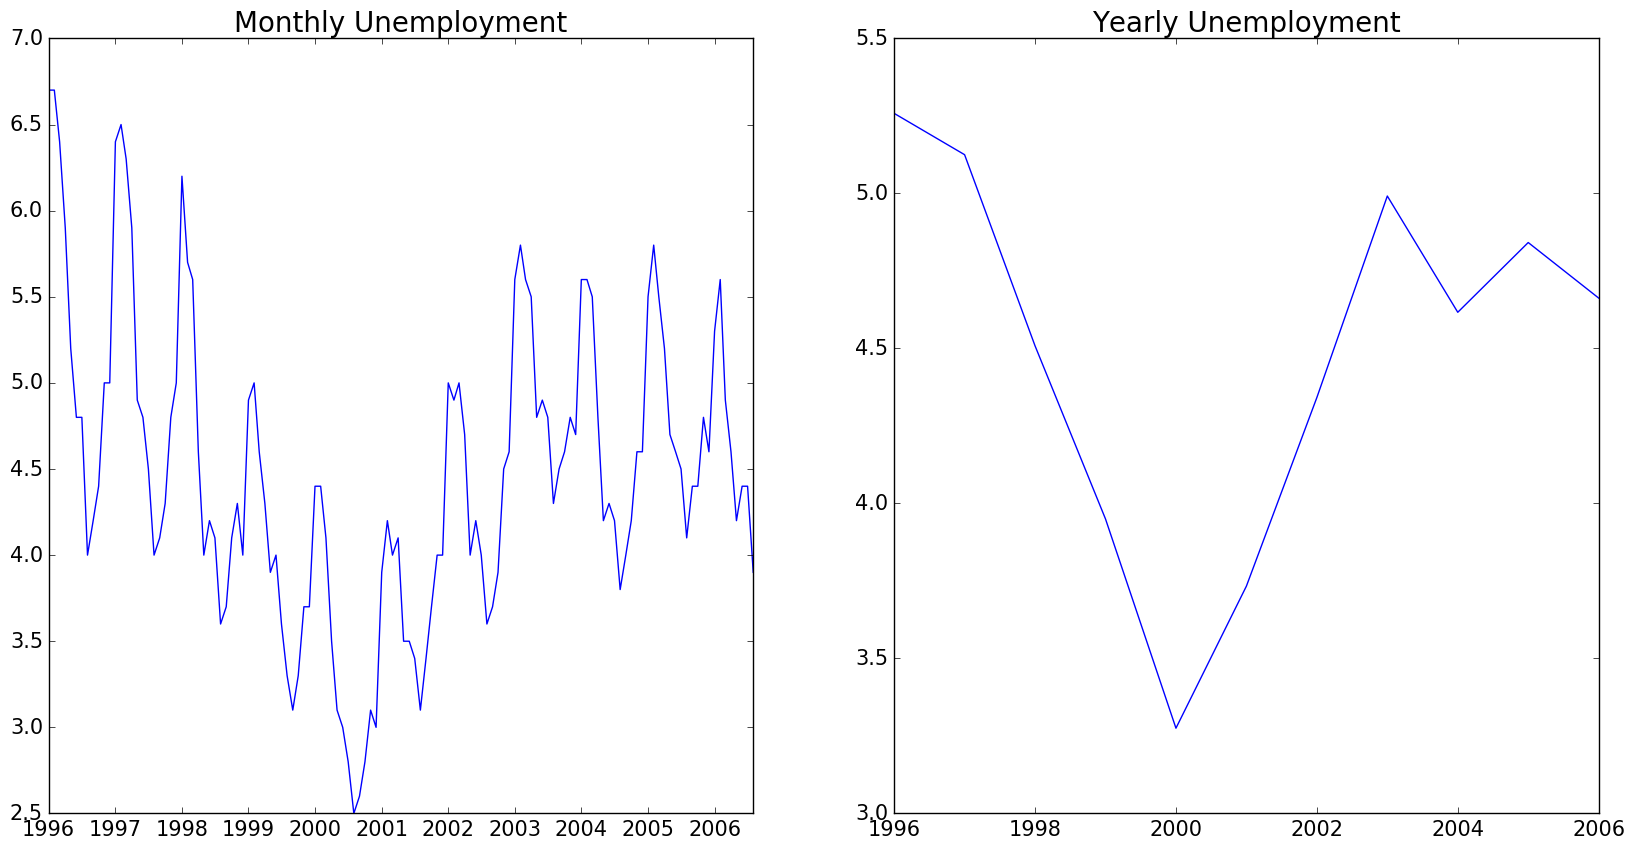

In [81]:
fig = plt.figure(figsize = (20,10))
# (###) means row, column, plot position
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

## the data
x1 = ME['fdate']
y1 = ME['unemploy']

x2 = dann['year']
y2 = dann['unemploy']

ax1.plot(x1,y1,color='blue')
ax1.tick_params(labelsize=15)
ax1.set_title("Monthly Unemployment", fontsize=20)

ax2.plot(x2,y2,color='blue')
ax2.tick_params(labelsize=15)
ax2.set_title("Yearly Unemployment", fontsize=20)

plt.show()